# Using CTGANs to Create Synthetic Datasets 

>
> [KDnuggets: How to Generate Synthetic Tabular Dataset](https://www.kdnuggets.com/2022/03/generate-tabular-synthetic-dataset.html)
> 
> [Synthetic Data Vault (SDV)](https://sdv.dev/SDV/#)
>
> [Conditional Generative Adversarial Network (CTGANs)](https://github.com/sdv-dev/CTGAN)
>
> [Conditional Generative Adversarial Nets](https://arxiv.org/abs/1411.1784)
> 
> [Demystifying the CTGAN Loss Function](https://github.com/sdv-dev/SDV/discussions/980)
>
> [CTGAN vs SDV](https://www.libhunt.com/compare-CTGAN-vs-SDV)
> 

<img src="./images/ctgans_vs_sdv.png" alt="Drawing" style="width: 700px;"/>

## Install Required Packages

In [2]:
!pip install ctgan


     |████████████████████████████████| 61 kB 840 kB/s eta 0:00:01
     |████████████████████████████████| 24.2 MB 11.8 MB/s eta 0:00:01
     |████████████████████████████████| 887.4 MB 13 kB/s s eta 0:00:01:214:20 MB 10.8 MB/s eta 0:01:13                  | 101.3 MB 10.8 MB/s eta 0:01:13MB/s eta 0:01:06██                          | 169.2 MB 12.1 MB/s eta 0:01:00                  | 204.1 MB 10.7 MB/s eta 0:01:04��███▍                        | 204.8 MB 10.7 MB/s eta 0:01:04��███▍                        | 205.8 MB 10.7 MB/s eta 0:01:04     |███████▌                        | 208.2 MB 10.7 MB/s eta 0:01:04    |██████████▍                     | 288.5 MB 4.7 MB/s eta 0:02:07MB/s eta 0:00:47███▋                 | 406.1 MB 2.6 MB/s eta 0:03:04[K     |██████████████████▍             | 508.9 MB 7.3 MB/s eta 0:00:52   | 556.0 MB 5.0 MB/s eta 0:01:07██████████████▊           | 575.5 MB 12.0 MB/s eta 0:00:26██████████████▊           | 576.1 MB 12.0 MB/s eta 0:00:26██████▉           | 577.0 MB 12.0 

In [3]:
!pip install sdv


     |████████████████████████████████| 102 kB 1.5 MB/s ta 0:00:01
     |████████████████████████████████| 1.6 MB 4.0 MB/s eta 0:00:01
     |████████████████████████████████| 47 kB 6.3 MB/s  eta 0:00:01
     |████████████████████████████████| 53 kB 3.4 MB/s  eta 0:00:01
     |████████████████████████████████| 139 kB 10.2 MB/s eta 0:00:01
     |████████████████████████████████| 15.3 MB 13.3 MB/s eta 0:00:01
  Attempting uninstall: Faker
    Found existing installation: Faker 15.3.4
    Uninstalling Faker-15.3.4:
      Successfully uninstalled Faker-15.3.4
  Attempting uninstall: plotly
    Found existing installation: plotly 5.6.0
    Uninstalling plotly-5.6.0:
      Successfully uninstalled plotly-5.6.0
  Attempting uninstall: ctgan
    Found existing installation: ctgan 0.6.0
    Uninstalling ctgan-0.6.0:
      Successfully uninstalled ctgan-0.6.0
  Attempting uninstall: cloudpickle
    Found existing installation: cloudpickle 2.0.0
    Uninstalling cloudpickle-2.0.0:
      Successful

In [19]:
!pip install table-evaluator


     |████████████████████████████████| 285 kB 2.6 MB/s eta 0:00:01
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.11.2
    Uninstalling seaborn-0.11.2:
      Successfully uninstalled seaborn-0.11.2


In [21]:
!pip install seaborn


## General Imports

In [23]:
import pandas as pd

from sdv.tabular import CTGAN
from ctgan import CTGANSynthesizer
from sdv.evaluation import evaluate
from table_evaluator import load_data, TableEvaluator

import warnings
warnings.filterwarnings('ignore')


## Import Data into Pandas Dataframe

In [8]:
data = pd.read_csv("./food-demand-forecasting/train.csv").sample(frac=1).reset_index(drop=True)[0:2000]
data.head()


,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
0,1195890,105,42,2631,99.00,97.00,0,0,55
1,1235012,20,177,2826,327.86,327.86,0,0,190
2,1428092,30,17,1247,445.23,445.23,0,0,14
3,1057345,120,161,2569,281.30,281.30,0,0,81
4,1113350,1,81,2631,196.94,242.50,0,0,82


## CTGAN for data generation

In [25]:
# create model
discrete_columns = ['week',
                    'center_id',
                    'meal_id',
                    'emailer_for_promotion',
                    'homepage_featured']

ctgan = CTGANSynthesizer(batch_size=50, epochs=5, verbose=False)
ctgan.fit(data, discrete_columns)


In [26]:
# save model
ctgan.save('./models/ctgan-food-demand.pkl')
ctgan_samples = ctgan.sample(2000)
ctgan_samples.head()


,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
0,1089751,74,51,2577,578.925970,181.408814,0,0,345
1,1211099,100,41,1207,245.062316,335.571944,1,0,584
2,1016879,71,27,1962,571.774920,153.795153,0,0,314
3,977276,36,109,1062,249.451826,179.916765,0,0,27
4,1321689,46,51,1778,551.843103,817.090737,0,0,1298


In [27]:
# use SDV to evaluate ctgan generated samples
evaluate(ctgan_samples, data)


0.8888888888888888

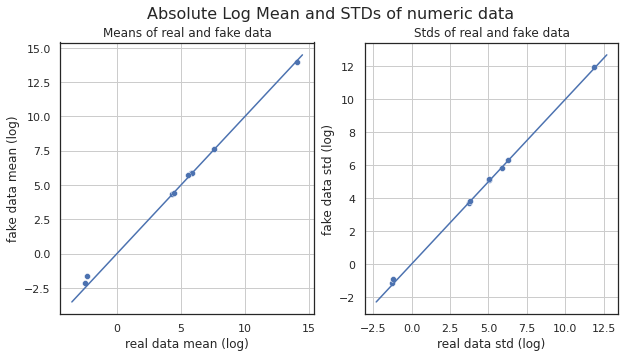

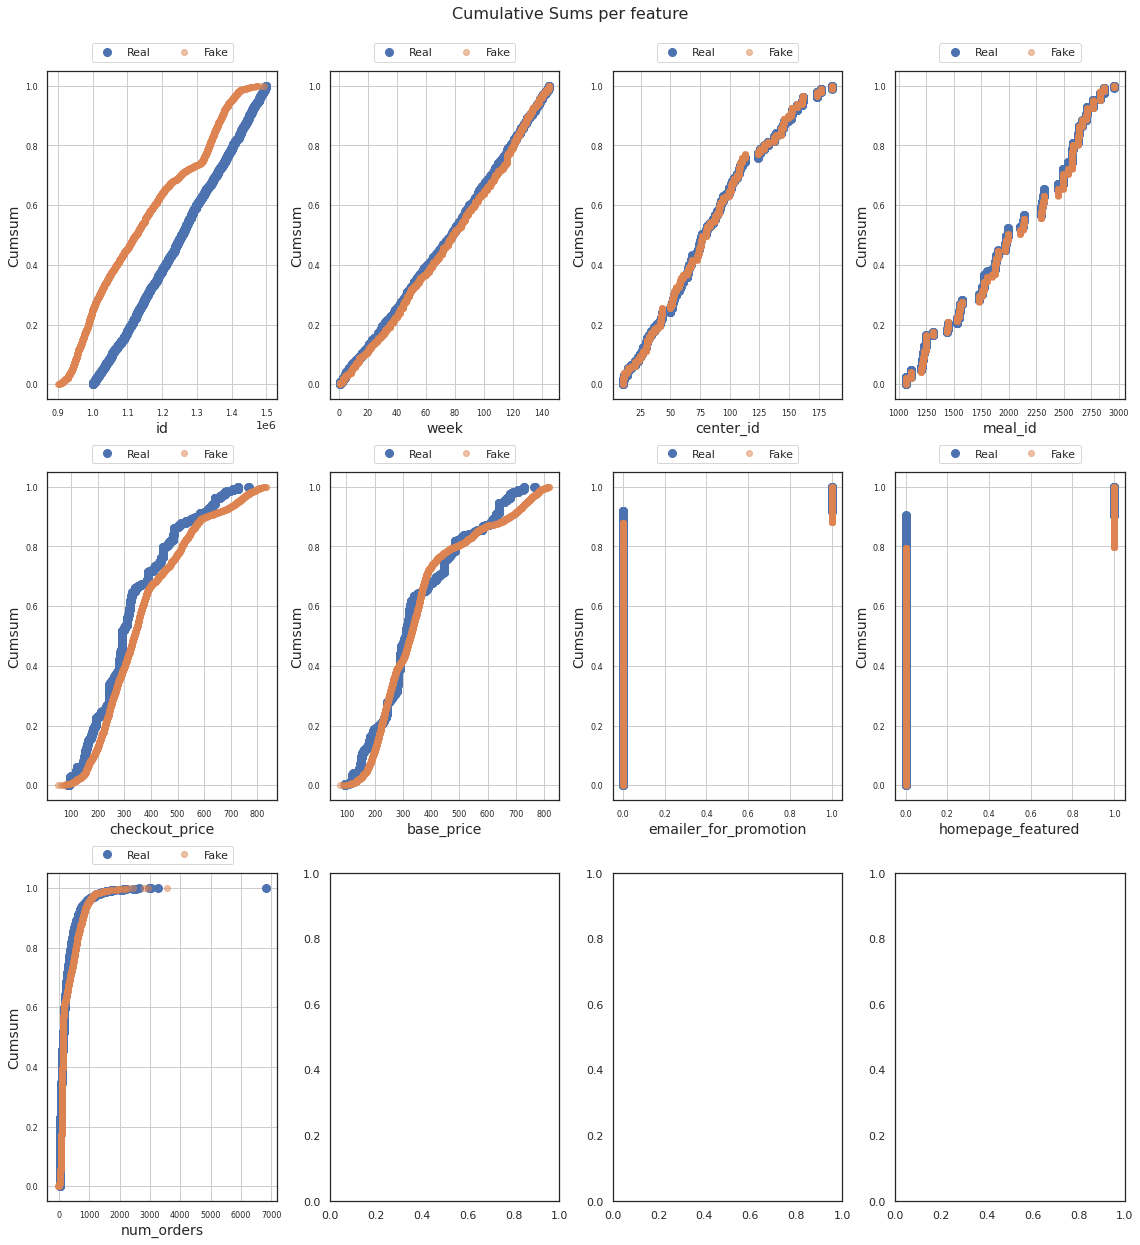

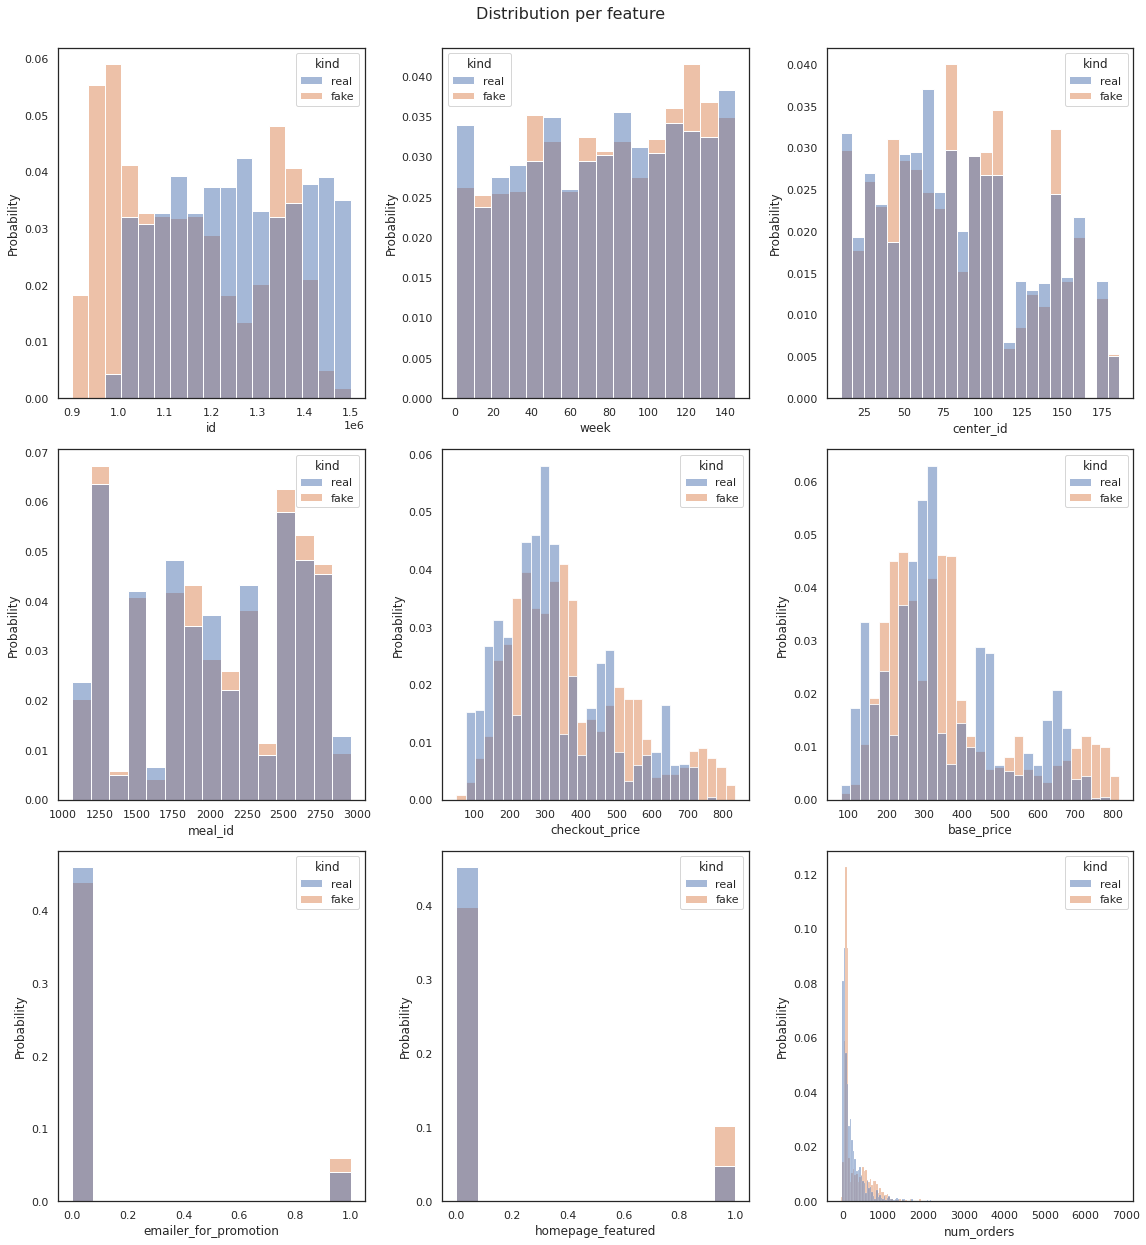

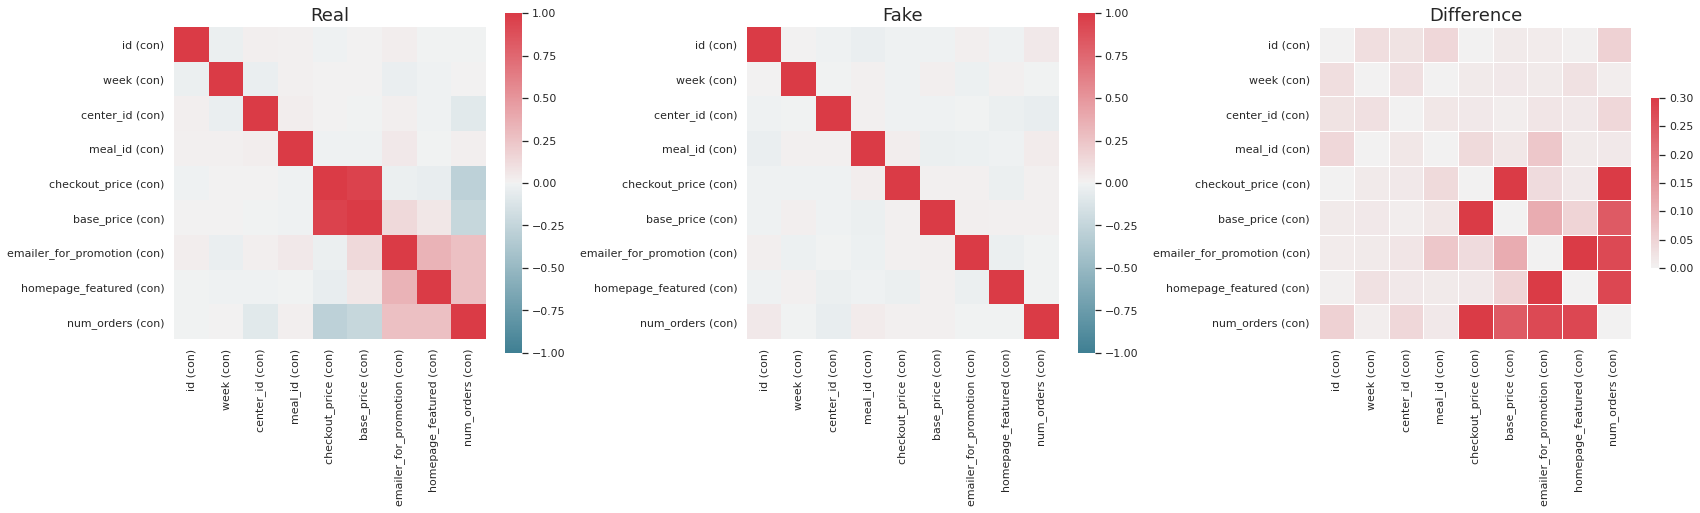

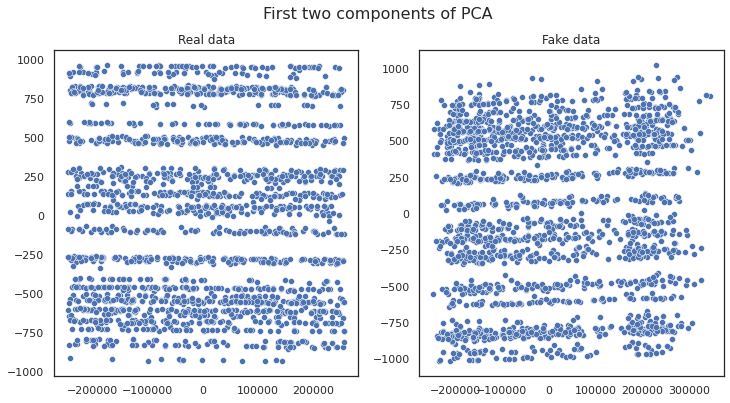

In [28]:
# detailed model evaluation using tableEvaluator
# exclusively built for analyzing the performance of GAN-based tabular models
table_evaluator = TableEvaluator(data, ctgan_samples)
table_evaluator.visual_evaluation()


## SDV for data generation

In [29]:
# create model
model = CTGAN(primary_key='id')
model.fit(data)


In [30]:
# save model
model.save("./models/sdv-ctgan-food-demand.pkl")
sdv_samples = model.sample(200)
sdv_samples.head()


,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
0,0,27,150,2589,285.32,730.64,0,1,99
1,1,105,66,2690,177.73,211.11,1,1,661
2,2,47,130,2118,120.28,157.34,0,0,60
3,3,84,68,1658,508.91,683.48,0,0,144
4,4,81,106,1624,604.76,136.66,1,1,490


In [31]:
# use SDV to evaluate ctgan generated samples
evaluate(sdv_samples, data)


0.732111111111111

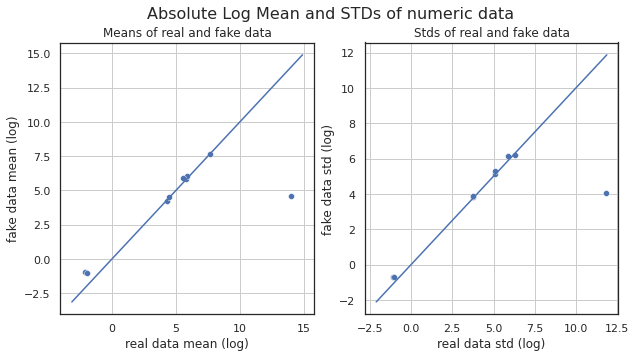

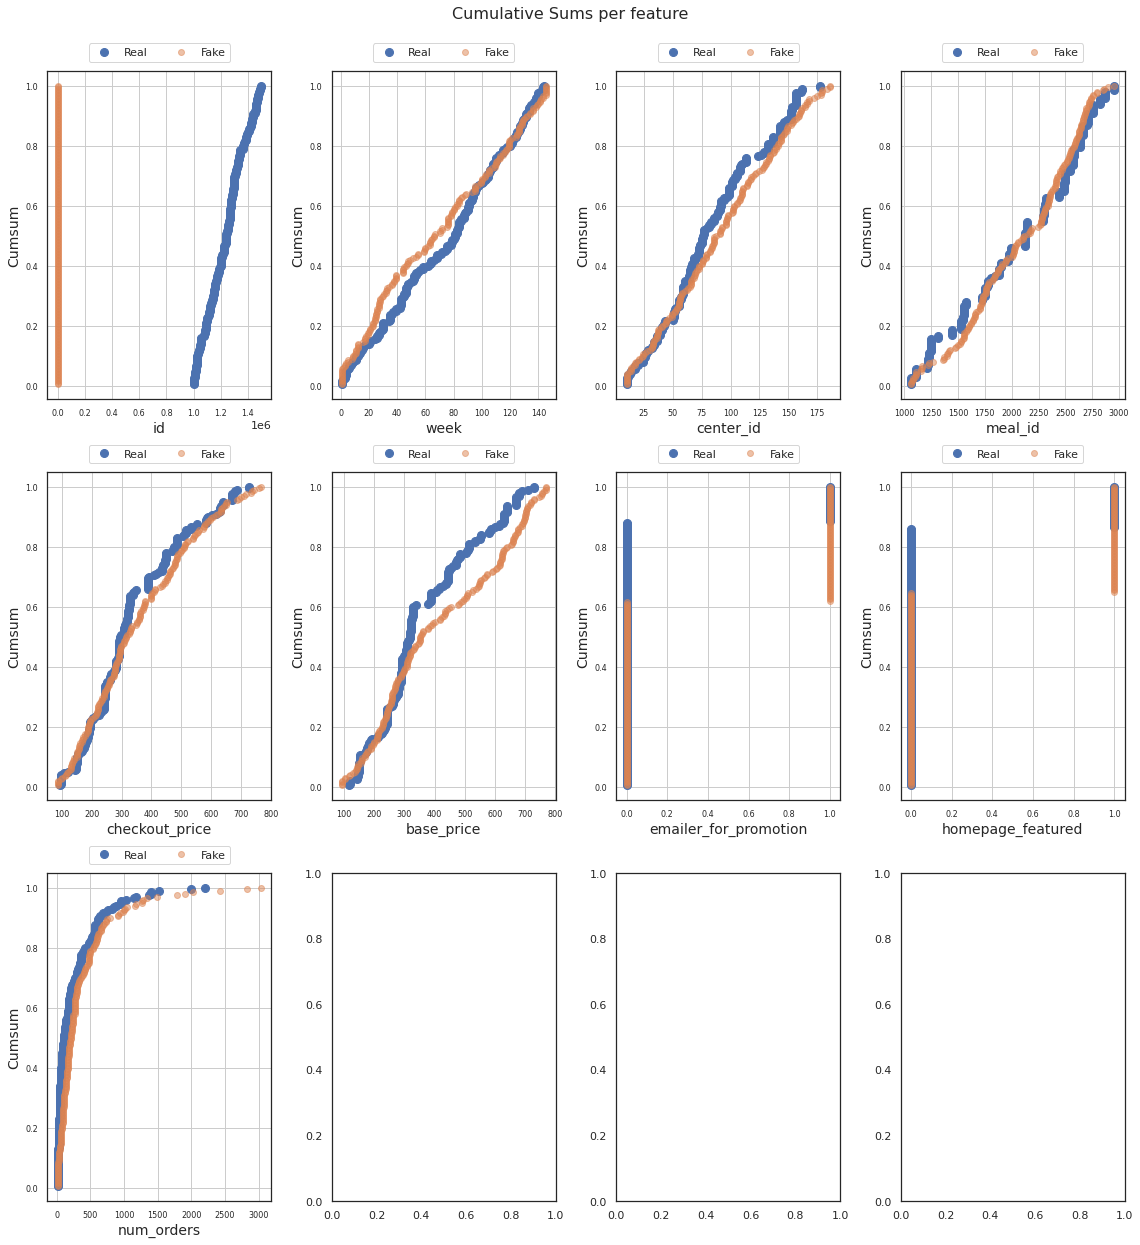

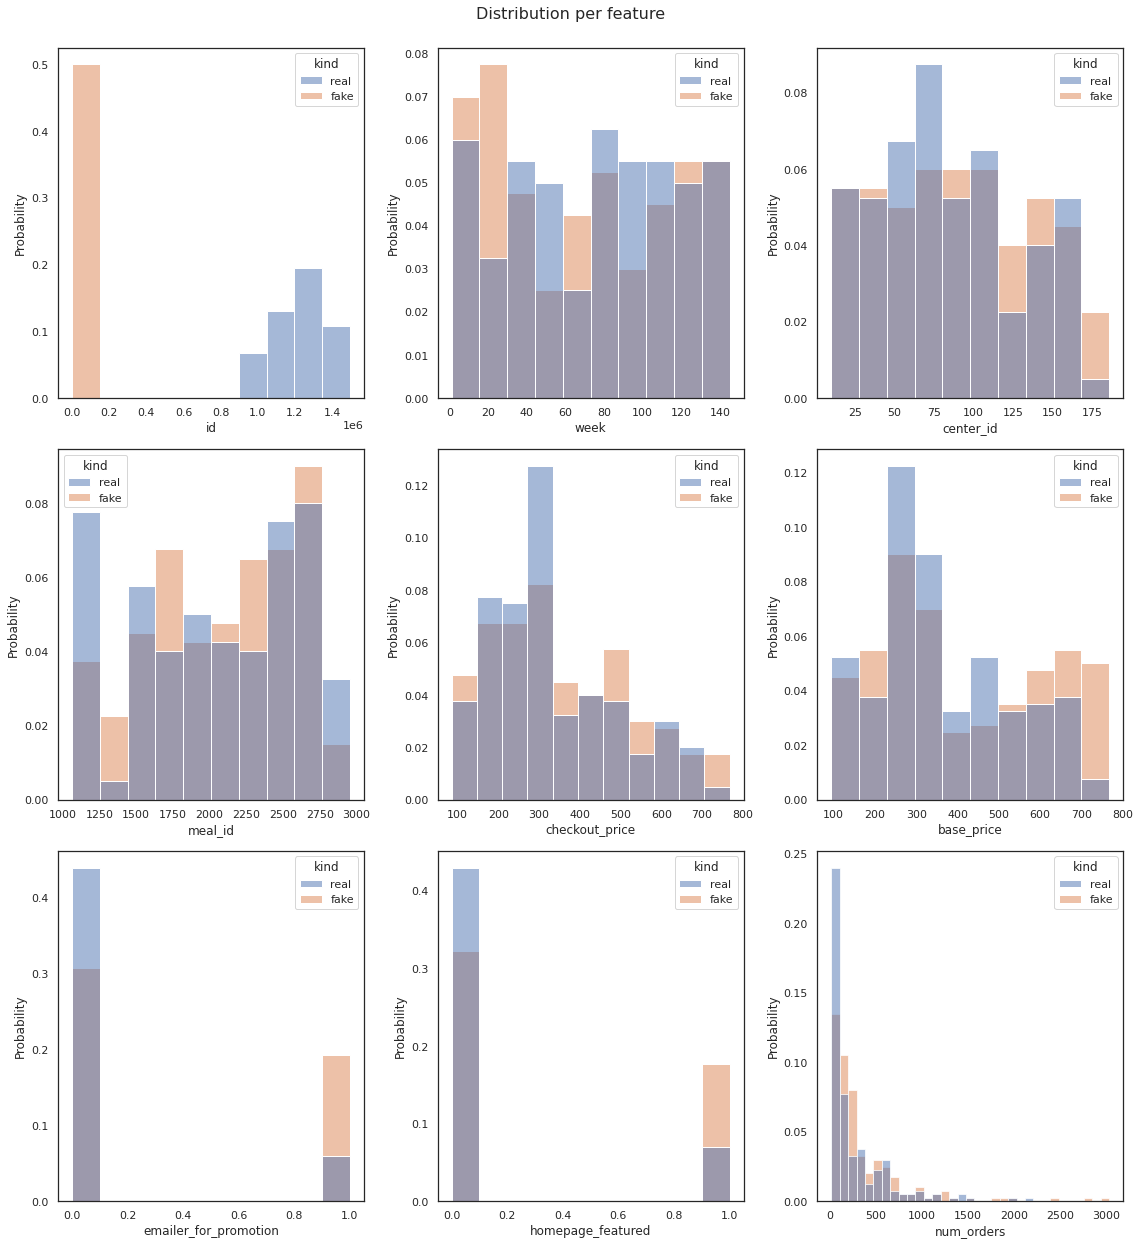

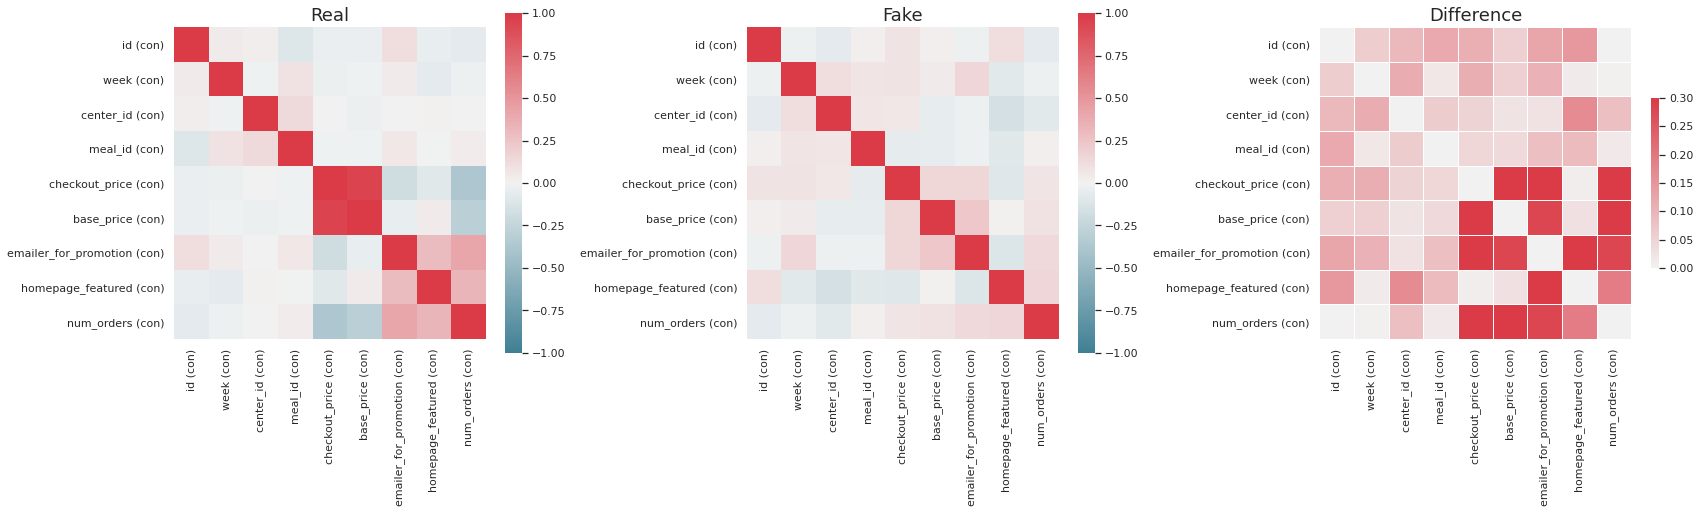

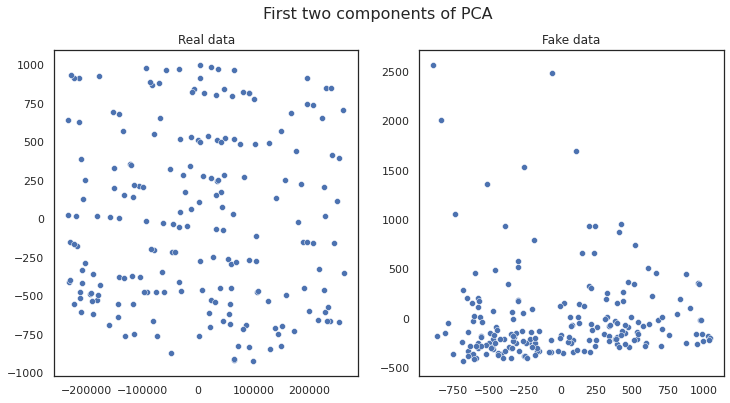

In [32]:
# detailed model evaluation using tableEvaluator
# exclusively built for analyzing the performance of GAN-based tabular models
table_evaluator = TableEvaluator(data, sdv_samples)
table_evaluator.visual_evaluation()


## Custom Model

In [51]:
# train model
model = CTGAN(
    epochs=500,
    batch_size=100,
    generator_dim=(256, 256, 256),
    discriminator_dim=(256, 256, 256)
)
model.fit(data)


In [52]:
# save model
model.save("./models/manual-CTGAN.pkl")


In [79]:
# create condition filter
from sdv import sampling

conditions = sampling.Condition({"center_id": 161})
model.sample_conditions(
    conditions=[conditions], 
    max_tries_per_batch=1000, 
    batch_size=100, 
    randomize_samples=False
)


Sampling conditions: 100%|██████████| 1/1 [00:13<00:00, 13.83s/it]


,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
0,1082891,72,161,1701,438.35,129.03,0,1,74


In [80]:
# larger sample size
ctgan_samples_custom = model.sample(2000)


In [81]:
# use SDV to evaluate ctgan generated samples
evaluate(ctgan_samples_custom, data)


0.8107222222222222

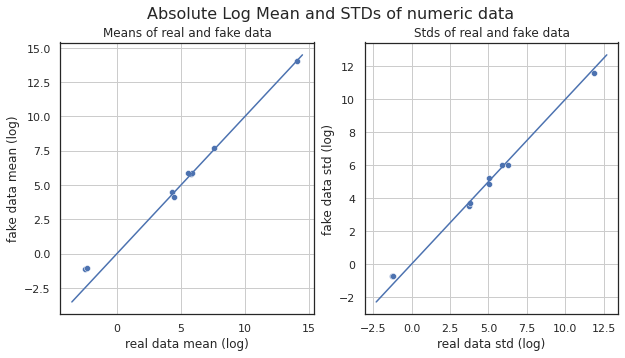

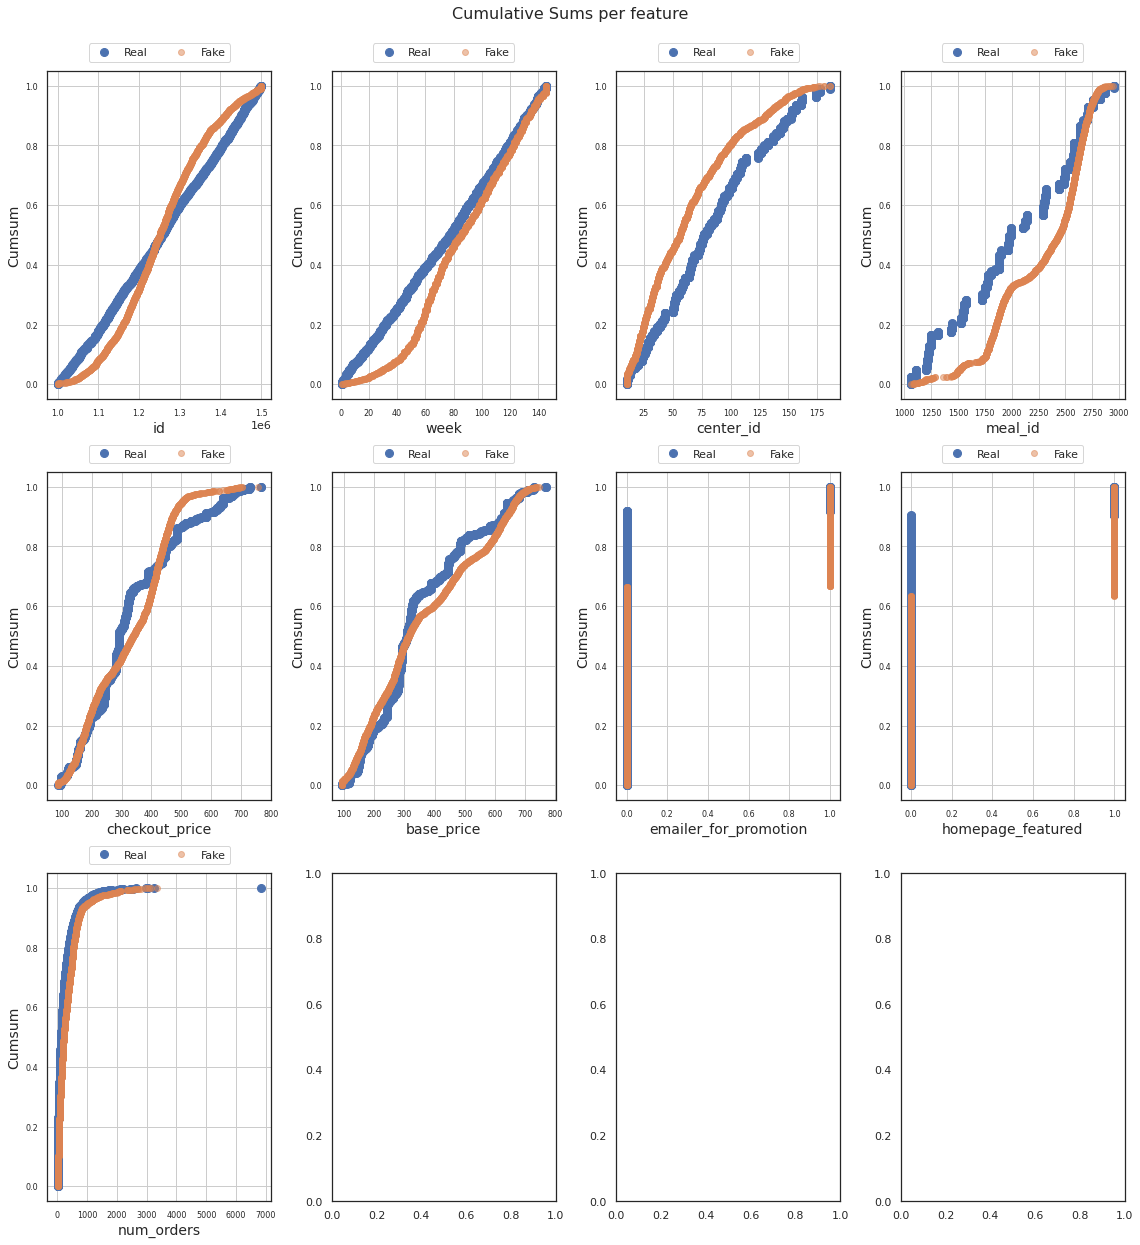

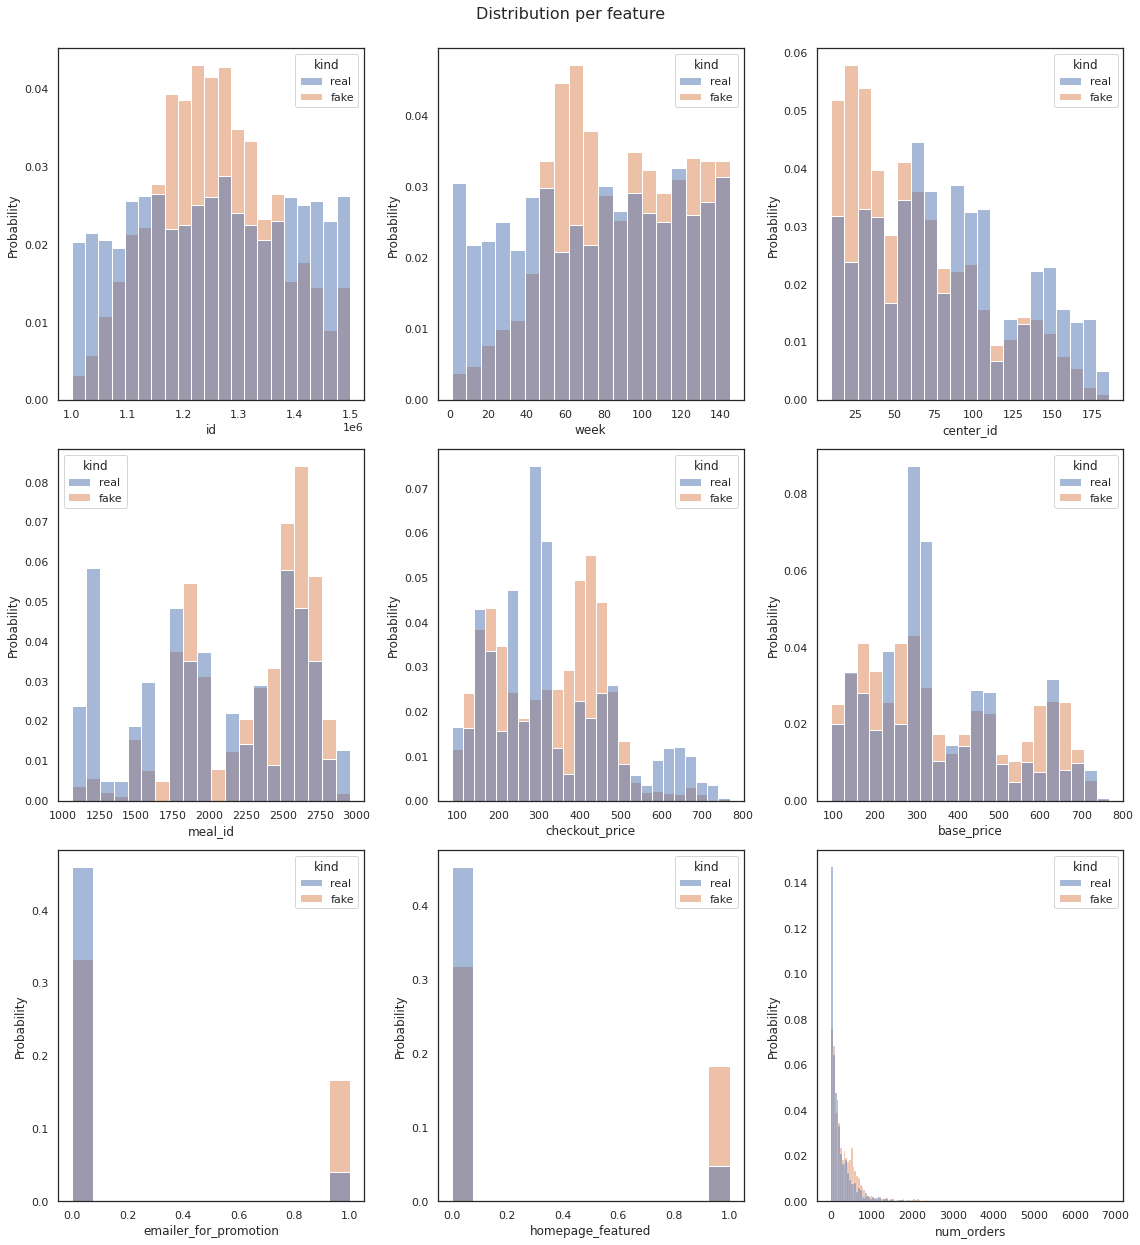

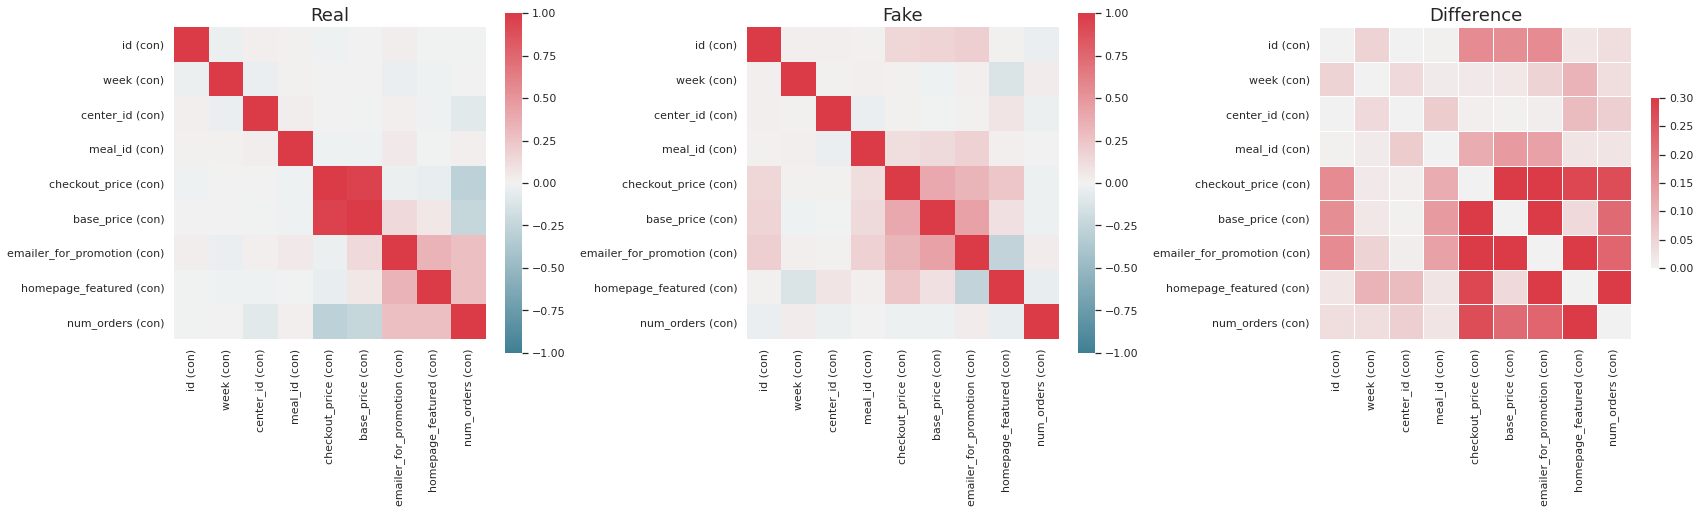

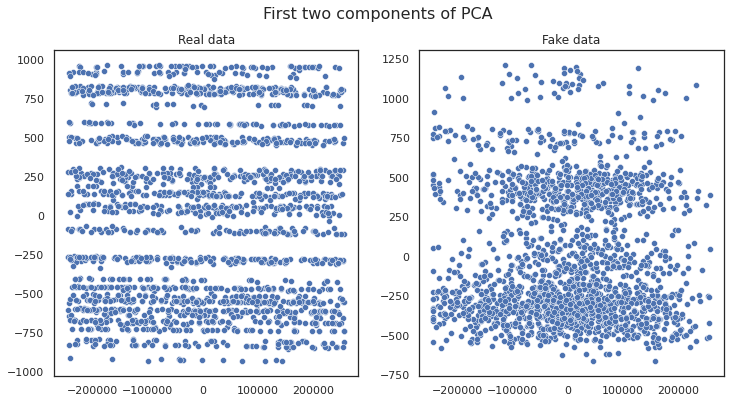

In [69]:
# detailed model evaluation using tableEvaluator
# exclusively built for analyzing the performance of GAN-based tabular models
table_evaluator = TableEvaluator(data, ctgan_samples_custom)
table_evaluator.visual_evaluation()
